<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ノートブックのインターフェース" data-toc-modified-id="ノートブックのインターフェース-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ノートブックのインターフェース</a></span></li><li><span><a href="#準備" data-toc-modified-id="準備-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>準備</a></span></li><li><span><a href="#Excelファイルの読み込み" data-toc-modified-id="Excelファイルの読み込み-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Excelファイルの読み込み</a></span></li><li><span><a href="#プロット" data-toc-modified-id="プロット-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>プロット</a></span></li><li><span><a href="#図を入れる" data-toc-modified-id="図を入れる-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>図を入れる</a></span></li><li><span><a href="#文書をダウンロード" data-toc-modified-id="文書をダウンロード-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>文書をダウンロード</a></span></li></ul></div>

# Jupyter-R Tutorial 1

Yoshinobu Ishizaki
2020/02/19

## ノートブックのインターフェース

セルごとにコマンドや次の文章を書いていくスタイル。

セルが選択された状態でEnterすると、セル内がクリックされた状態となり、そのセル内の文字編集が出来る。
文字編集中のEnterは改行になる。
編集中のセルは緑枠で囲まれる。選択しただけだと水色。
Shift+Enterでセルが確定。コマンドセルの場合はそのコマンドが実行される。
Escキーでもセル編集から抜けられる(その場合コマンドは実行されない)。

セル選択した状態(セル編集ではなく)で、Aキーを押すとその前にからのセルが挿入される。

Bキーだと下に新しいセルが挿入。

Xキーだとカット。Cキーがコピー。Vでペースト（選択したセルの下にペースト）。

X,C,Vは複数セルに対して機能する。Shiftキーを押しながら矢印キーで選択範囲を広げる事が出来る。

セルが選択された状態でMキーを押すとそのセルはマークダウンセル（地の文章用）となる。
Yキーでコマンドセル。
地の文をコマンドセルに書いて実行すると大抵エラーとなる（エラーメッセージが出るだけ）。

複数セルを一つにまとめるときは複数選択後にShift+M。
逆にセルを2つに分割するときは、カーソルを分割位置に合わせてCtrl+=(Ctrl+Shift+-)

Pキーでコマンド一覧が表示されそこでショートカットが確認できる。Hキーでショートカット一覧を見ることが出来る。

Markdown形式は覚えると便利なので、この機会に覚えていこう。

In [31]:
# コマンドセル内にコメントを書く場合は、対応したプログラミング言語のコメントマークをつける。
# Ctrl+/でその行のコメントと実行文との切り替えが出来る。
# RもPythonもコメントマークは#。

In [47]:
# Rのコマンドセルで編集時に、
# Alt + -を打つと <- （Rの式割当の命令）が入力される。 
# Ctrl+Shift+Mを打つと、 %>% （Rのパイプ命令）が入力される。

## 準備

Rでデータ分析するのに、必要なライブラリを読みこむ。
tidyverse, readxlの2つで大抵は事足りる。
Excelのデータの読み書きにはopenxlsxを使っても良い（readxlは読むだけなので）。

In [1]:
library(tidyverse)
library(readxl)
library(openxlsx)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [35]:
# おまじない。プロットの大きさが見やすいように。
options(repr.plot.width = 10, repr.plot.height = 10/16*9) # 16:9 

# 文字をちょっと大きく
theme_set(theme_grey(base_size = 16))

## Excelファイルの読み込み

予めアップロードしてあるエクセルのファイルを読み込む。

In [43]:
# raadxlの場合 _でつながったコマンド
# シートが1枚しか無いのでファイル名の指定だけで読み込める
d1  <- read_xlsx("trfh8310z2-kncl-hardness2.xlsx")

In [22]:
head(d1)

no,HV,name,remark
<dbl>,<dbl>,<chr>,<chr>
1,112.1,TR8310Z 枝管1,中子なし
1,99.4,TR8310Z 枝管1,中子なし
1,99.9,TR8310Z 枝管1,中子なし
2,103.4,TR8310Z 枝管1,中子なし
2,114.3,TR8310Z 枝管1,中子なし
2,104.1,TR8310Z 枝管1,中子なし


In [25]:
# openxlsxの場合は.でつながったコマンド
# 勿論シート名を指定しても良い
d2  <- read.xlsx("trfh8310z2-kncl-hardness2.xlsx","Sheet1")

In [26]:
head(d2)

,no,HV,name,remark
,<dbl>,<dbl>,<chr>,<chr>
1,1,112.1,TR8310Z 枝管1,中子なし
2,1,99.4,TR8310Z 枝管1,中子なし
3,1,99.9,TR8310Z 枝管1,中子なし
4,2,103.4,TR8310Z 枝管1,中子なし
5,2,114.3,TR8310Z 枝管1,中子なし
6,2,104.1,TR8310Z 枝管1,中子なし


基本同じようにデータが読み込まれる。
データはRのdata.frameという形式として読み込まれる。

エクセルのデータは処理しやすいように以下の点に注意して整形しておく。

- 1行目をタイトル行にする。英字を使用する。空白は極力避ける。
- 縦積み形式にする = 各列はある属性ごとにまとめる。分散分析の用語で言えば、因子は列に水準は水準を示す列のデータとして入れる。
- 数値は数値として入力。桁区切りの,や単位の文字列などを入れない。

データの各列の意味などはJupyterノートブックの文章で説明すれば良い。
エクセルファイルの中で説明する場合は、別のシートに説明文を書く。

In [27]:
# データサイズを知る。行、列の数(indexは含まない)
dim(d2)

[1] 40  4

In [28]:
# tailで最後の方を表示
tail(d2)

,no,HV,name,remark
,<dbl>,<dbl>,<chr>,<chr>
35,214,128.4,XYTR1335枝管1,NA
36,214,120.3,XYTR1335枝管1,NA
37,214,121.8,XYTR1335枝管1,NA
38,214,123.8,XYTR1335枝管1,NA
39,214,123.8,XYTR1335枝管1,NA
40,214,127.4,XYTR1335枝管1,NA


この事例が縦積み(stack)形式。

全データは硬さHVを比較する目的で集めてある。硬さは1列にしてある。
各種の水準（no,name,remark)もそれぞれ列にまとめてある。
noは測定日付と固有番号が混在しているので、本来は更に2列に分けておくのがより望ましい。

次は表形式の例。

In [42]:
# シート名を指定して読み込むことが出来る。
d_kncl  <- read.xlsx("sl825-tube-outerdia.xlsx","kncl")

In [46]:
# パイプ渡し( %>% )でコマンドをつなげることも出来る
d_kncl %>% head

,name,DoH1,DoV1,H1534H,H1534V,H1529H,H1529V
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,KNCL1-1,15.172,15.370,0.168,-0.030,0.118,-0.080
2,KNCL1-1,15.148,15.309,0.192,0.031,0.142,-0.019
3,KNCL1-1,15.201,15.347,0.139,-0.007,0.089,-0.057
4,KNCL1-1,15.182,15.313,0.158,0.027,0.108,-0.023
5,KNCL1-1,15.197,15.342,0.143,-0.002,0.093,-0.052
6,KNCL1-1,15.201,15.274,0.139,0.066,0.089,0.016


これは管の直径を測定したデータ。
xxxHとxxxVは縦横の測定値で属性が異なるので列も別で良いが、
H1534H/V, H1529H/Vは

$$
\begin{align}
\texttt{H1534H} & = 15.34 - \texttt{DoH1} \\
\texttt{H1529H} & = 15.29 - \texttt{DoH1} 
\end{align}
$$

によって定義された列であり、ある径に対してのクリアランスという意味あいであるから1列にまとめるべきもの。

このように1列になるべき属性のものを複数列に列挙する書き方は表形式といいデータ処理上望ましくないが、反面人に読みやすく保守もしやすい利点がある。

エクセルでは表形式で作成しておいて、R側で縦積みに変形する手はある。

In [66]:
da  <- d_kncl %>% select(name, H1534H, H1529H) %>% gather("keyH","ClearanceH", -name)

In [67]:
head(da)

,name,keyH,ClearanceH
,<chr>,<chr>,<dbl>
1,KNCL1-1,H1534H,0.168
2,KNCL1-1,H1534H,0.192
3,KNCL1-1,H1534H,0.139
4,KNCL1-1,H1534H,0.158
5,KNCL1-1,H1534H,0.143
6,KNCL1-1,H1534H,0.139


In [68]:
db  <- d_kncl %>% select(name, H1534V, H1529V) %>% gather("keyV","ClearanceV",-name)

In [69]:
head(db)

,name,keyV,ClearanceV
,<chr>,<chr>,<dbl>
1,KNCL1-1,H1534V,-0.030
2,KNCL1-1,H1534V,0.031
3,KNCL1-1,H1534V,-0.007
4,KNCL1-1,H1534V,0.027
5,KNCL1-1,H1534V,-0.002
6,KNCL1-1,H1534V,0.066


In [70]:
# 2つのデータをまとめる
d_kncl2  <- merge(da,db, by = "name")

In [71]:
d_kncl2 %>% head

,name,keyH,ClearanceH,keyV,ClearanceV
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,KNCL1-1,H1534H,0.168,H1534V,-0.030
2,KNCL1-1,H1534H,0.168,H1534V,0.031
3,KNCL1-1,H1534H,0.168,H1534V,-0.007
4,KNCL1-1,H1534H,0.168,H1534V,0.027
5,KNCL1-1,H1534H,0.168,H1534V,-0.002
6,KNCL1-1,H1534H,0.168,H1534V,0.066


## プロット

ggplotで様々な形式のプロットが出来る。

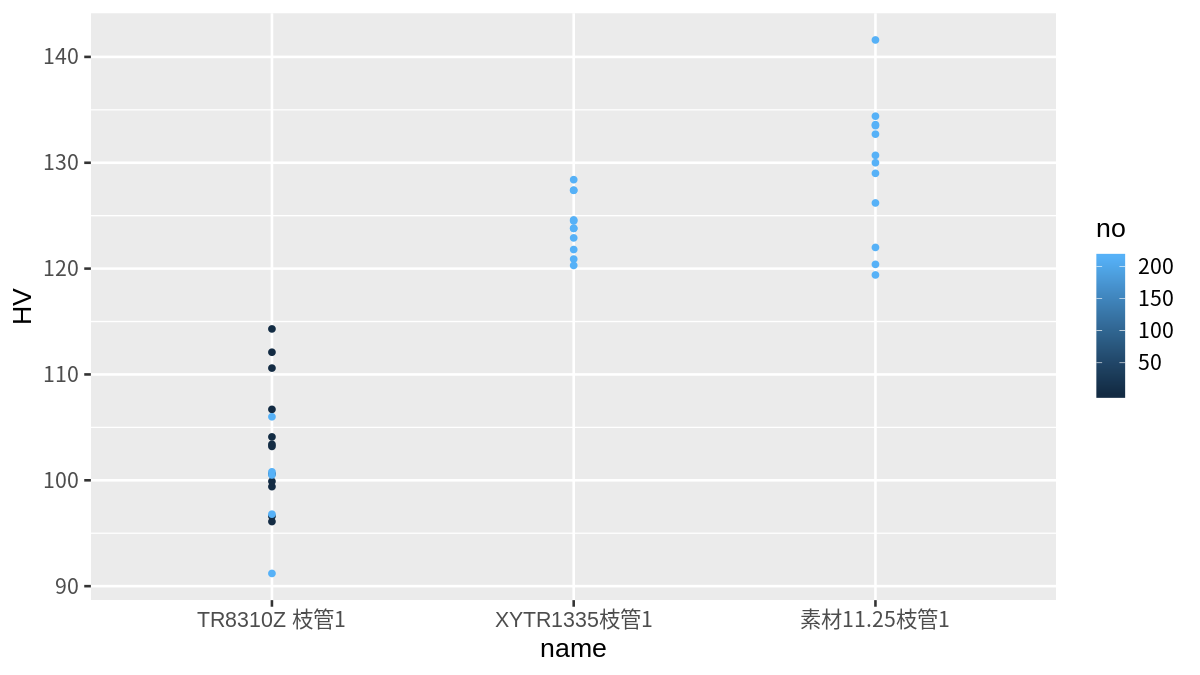

In [36]:
g1  <- ggplot(d2, aes(x = name, y = HV, color = no))
g1 + geom_point()

noが数値として認識されているので、因子化する。

In [38]:
as.factor(d2$no)

[1] 1   1   1   2   2   2   3   3   3   1   2   3   214 214 214 214 214 214 214
[20] 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214
[39] 214 214
Levels: 1 2 3 214

In [39]:
d2$no  <-  as.factor(d2$no)

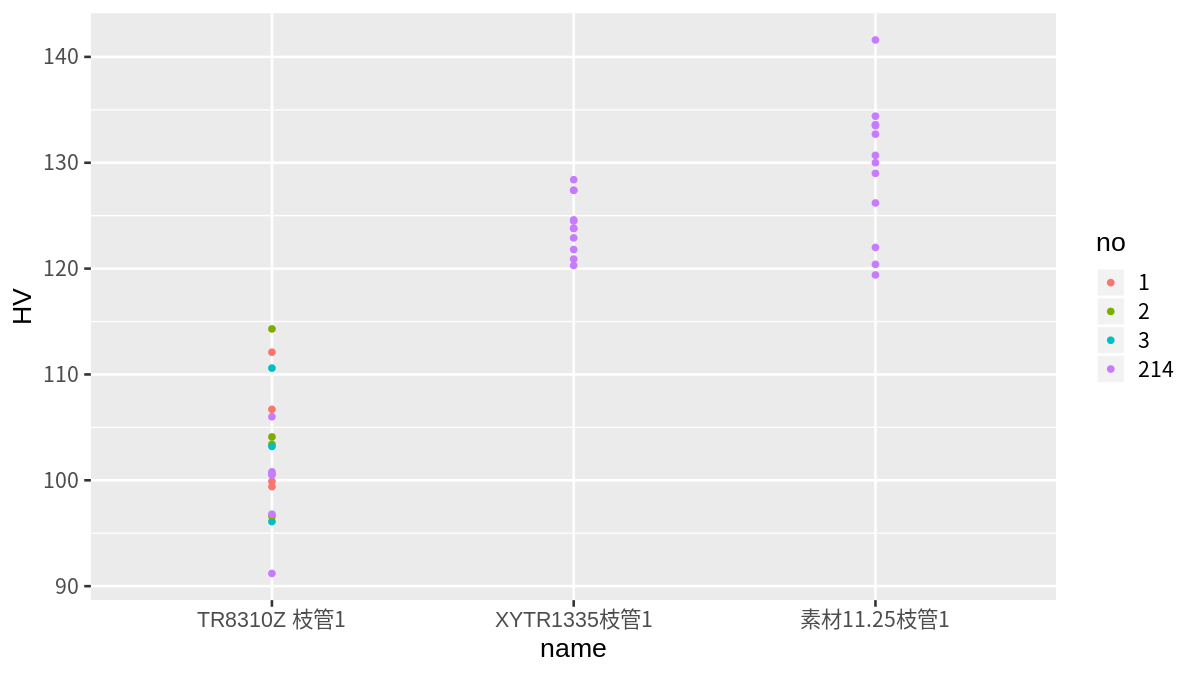

In [41]:
g1  <- ggplot(d2, aes(x = name, y = HV, color = no))
g1 + geom_point()

ヒストグラム

alpha, binsといったオプションを変更することで表示の様子を変更できる。

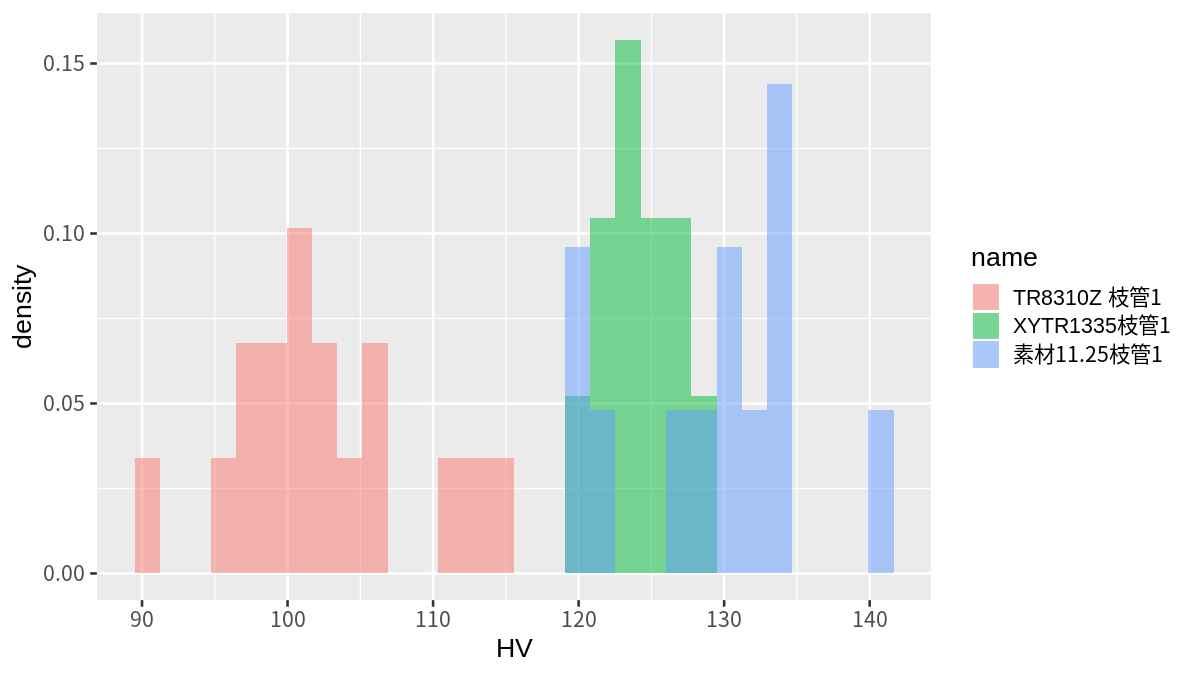

In [80]:
g2  <- ggplot(d2, aes(x = HV, fill = name))
g2 + geom_histogram(alpha = 0.5, bins = 30, position = "identity", aes(y = ..density..)) # y = ..density..にするとカウントでなく出現率になる

箱ひげ図(box plot)

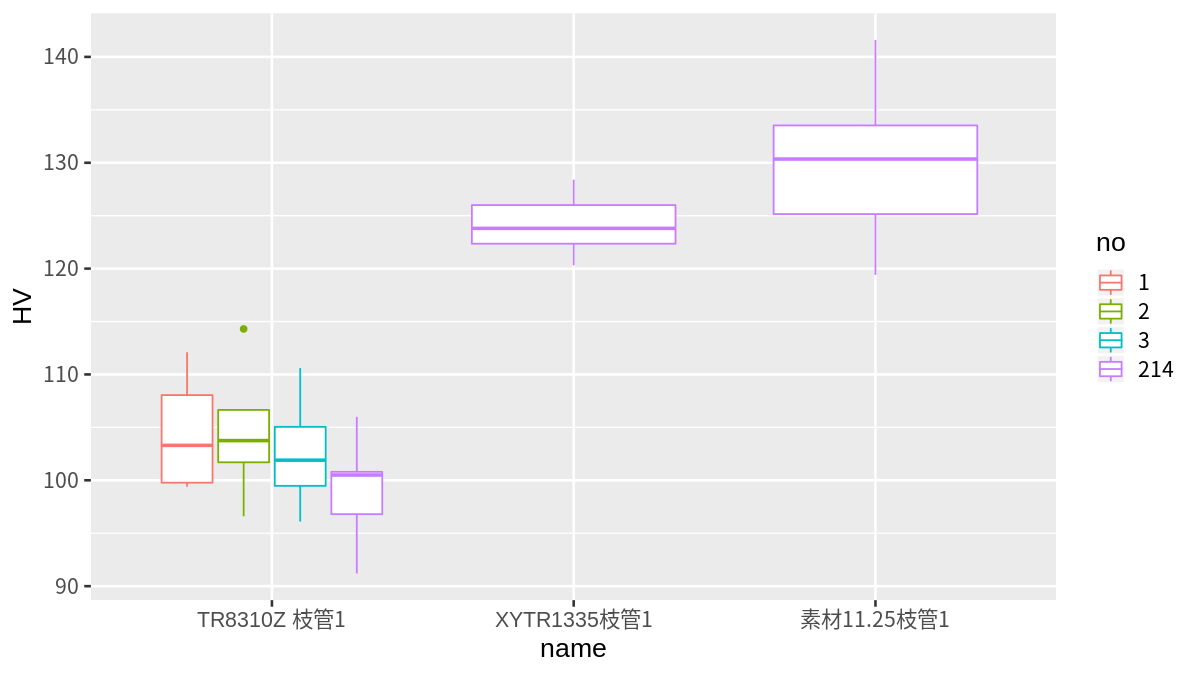

In [83]:
# g1は覚えているので、縦横軸に変化がなければg1 + プロット形式で別タイププロットが可能
g1 + geom_boxplot()

縦横軸の範囲を変える

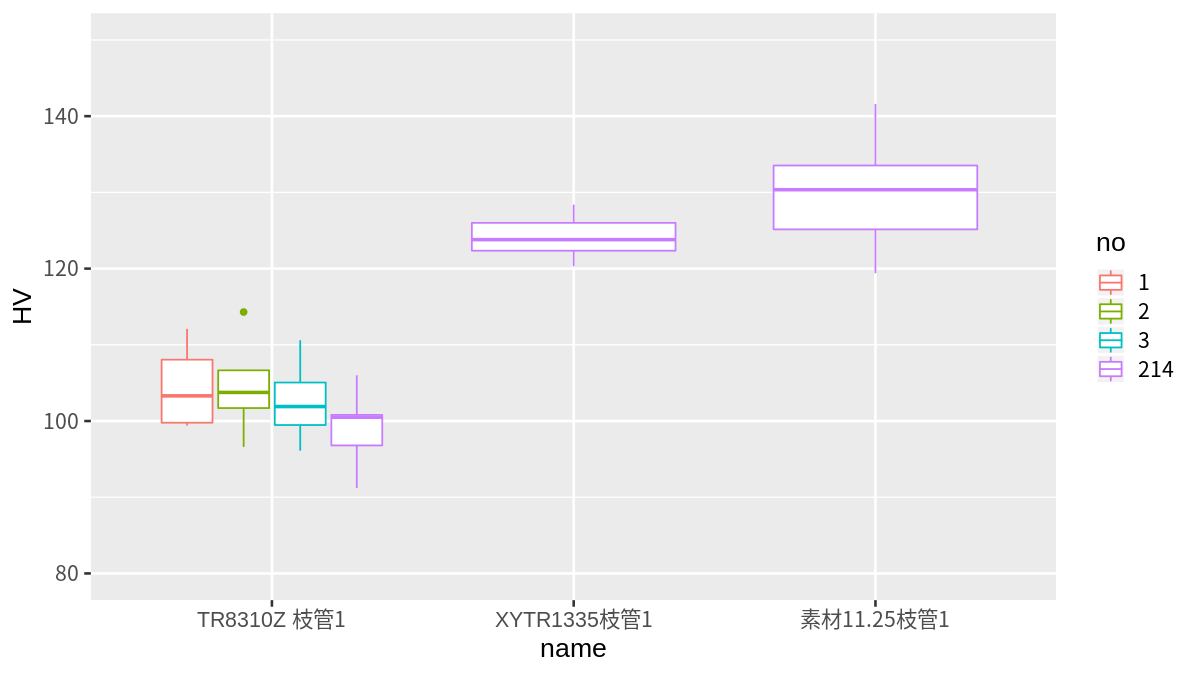

In [84]:
g1 + geom_boxplot() + scale_y_continuous(limits = c(80,150))

タイトルとか

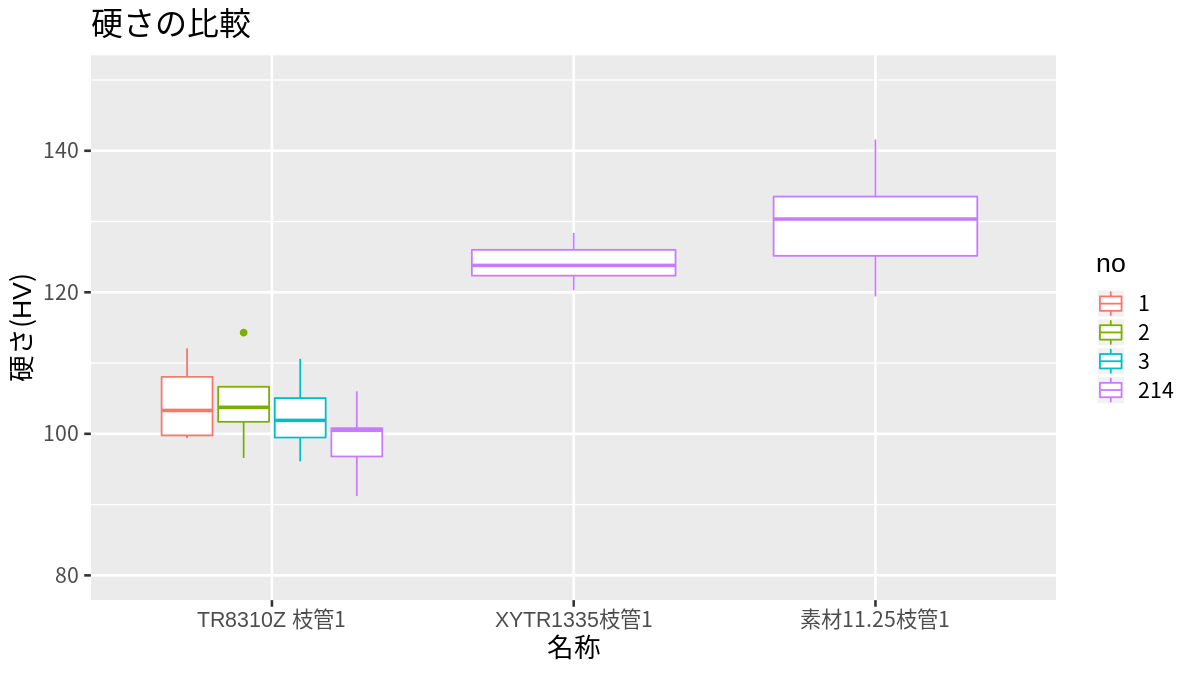

In [88]:
g1 + geom_boxplot() + scale_y_continuous(limits = c(80,150)) + labs(title = "硬さの比較", x = "名称", y="硬さ(HV)")

## 図を入れる

`![](ファイル名)`と入力することでセルに画像が読み込まれる。

![図のキャプションは無視される](sample.PNG)

## 文書をダウンロード

メニューからDownload as HTML。